In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

In [63]:
df = pd.read_csv('fcc-forum-pageviews.csv');


In [64]:
df = df.sort_values(by=['value']);
# m = stats.trim_mean(df['value'], 0.025);
# m = df['value'].rank(method='first').sub(1).between(0.025*len(df), 0.975*len(df),inclusive='left');
df = df[~((df['value'] < df['value'].quantile(0.025)) | (df['value'] > df['value'].quantile(0.975)))];
df

,date,value
17,2016-05-26,18060
30,2016-06-08,18072
31,2016-06-09,18139
29,2016-06-07,18335
37,2016-06-15,18584
...,...,...
1218,2019-09-09,174212
889,2018-10-15,174639
886,2018-10-12,176175
1264,2019-10-25,176921


In [65]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d');
df.set_index('date');
df

,date,value
17,2016-05-26,18060
30,2016-06-08,18072
31,2016-06-09,18139
29,2016-06-07,18335
37,2016-06-15,18584
...,...,...
1218,2019-09-09,174212
889,2018-10-15,174639
886,2018-10-12,176175
1264,2019-10-25,176921


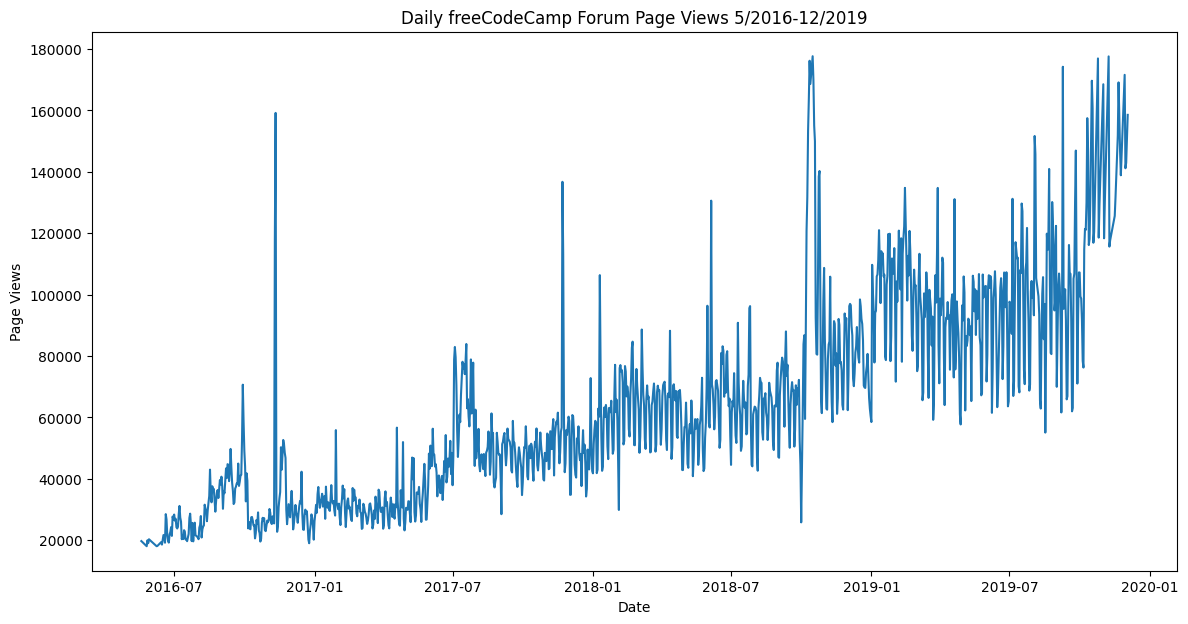

In [6]:
fig, ax = plt.subplots(figsize=(14, 7));
sns.lineplot(x=df['date'],y=df['value']);
ax.set(xlabel='Date', ylabel='Page Views',title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019');

In [66]:
dfc = df.copy()
dfc

,date,value
17,2016-05-26,18060
30,2016-06-08,18072
31,2016-06-09,18139
29,2016-06-07,18335
37,2016-06-15,18584
...,...,...
1218,2019-09-09,174212
889,2018-10-15,174639
886,2018-10-12,176175
1264,2019-10-25,176921


In [77]:
time_c= pd.to_datetime(dfc['date'], format='%Y-%m-%d');
dfc['Months'] = time_c.dt.month_name();
dfc['Years'] = time_c.dt.year;
hue_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'];
dfc

,date,value,Months,Years
17,2016-05-26,18060,May,2016
30,2016-06-08,18072,June,2016
31,2016-06-09,18139,June,2016
29,2016-06-07,18335,June,2016
37,2016-06-15,18584,June,2016
...,...,...,...,...
1218,2019-09-09,174212,September,2019
889,2018-10-15,174639,October,2018
886,2018-10-12,176175,October,2018
1264,2019-10-25,176921,October,2019


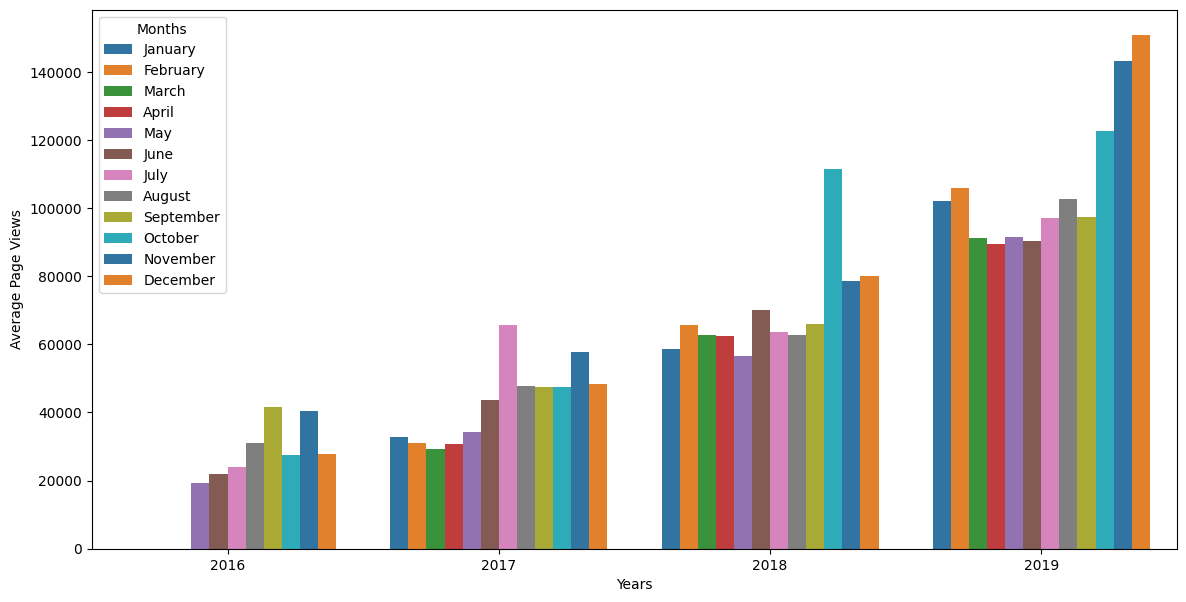

In [84]:
fig, ax = plt.subplots(figsize=(14, 7));
sns.barplot(x = "Years", y = "value",data = dfc, hue = "Months",errorbar=None,hue_order=hue_order,palette=sns.color_palette(n_colors=12));
# fig=sns.catplot(data=dfc, x="Years", y="value", hue="Months",kind="bar",palette=sns.color_palette(n_colors=12),errorbar=None,hue_order=hue_order);
ax.set(xlabel='Years', ylabel='Average Page Views');


In [69]:
dfc2 = df.copy()
dfc2

,date,value
17,2016-05-26,18060
30,2016-06-08,18072
31,2016-06-09,18139
29,2016-06-07,18335
37,2016-06-15,18584
...,...,...
1218,2019-09-09,174212
889,2018-10-15,174639
886,2018-10-12,176175
1264,2019-10-25,176921


In [71]:
time_c2= pd.to_datetime(dfc2['date'], format='%Y-%m-%d');
dfc2['Month'] = pd.to_datetime(df['date'], format='%m').dt.strftime('%b')
dfc2['Year'] = time_c.dt.year;
hue_order2 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'];
dfc2

,date,value,Month,Year
17,2016-05-26,18060,May,2016
30,2016-06-08,18072,Jun,2016
31,2016-06-09,18139,Jun,2016
29,2016-06-07,18335,Jun,2016
37,2016-06-15,18584,Jun,2016
...,...,...,...,...
1218,2019-09-09,174212,Sep,2019
889,2018-10-15,174639,Oct,2018
886,2018-10-12,176175,Oct,2018
1264,2019-10-25,176921,Oct,2019


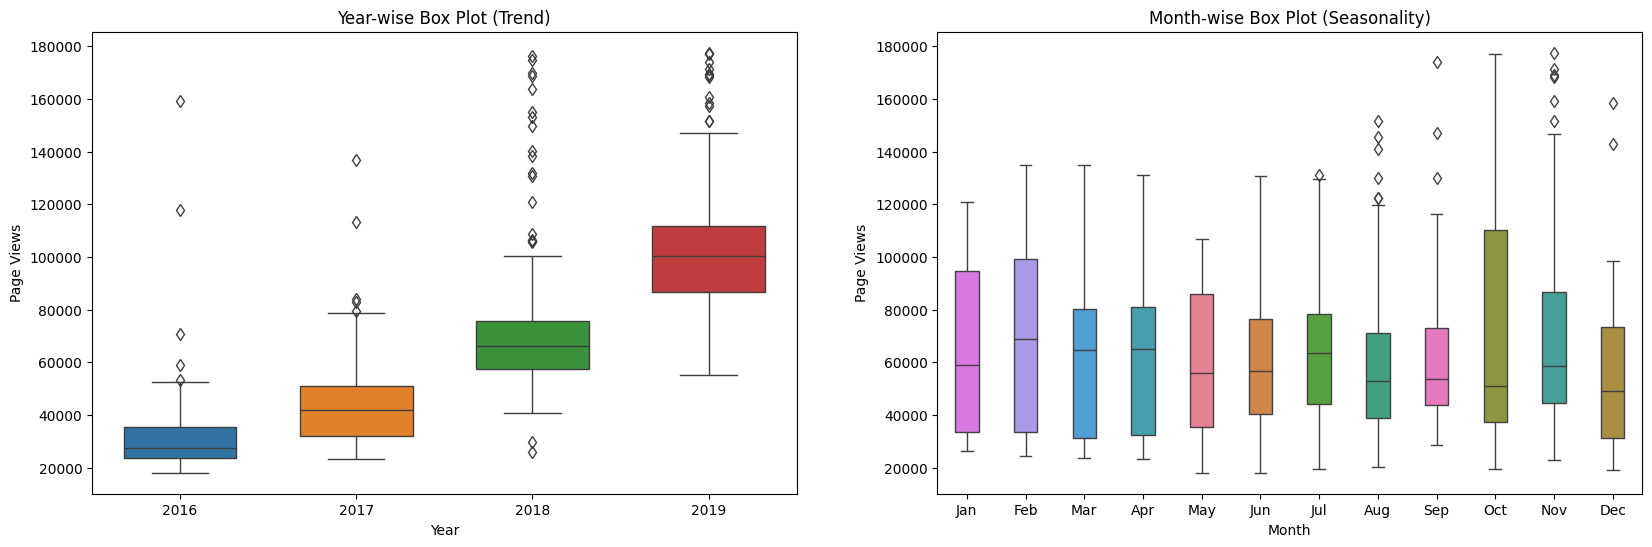

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6));
sns.boxplot(data=dfc2, x="Year", y="value", hue="Year",ax=ax1,legend=None,flierprops={"marker": "d"},gap=0.2,palette=sns.color_palette(n_colors=4));
ax1.set(xlabel='Year', ylabel='Page Views',title='Year-wise Box Plot (Trend)');
sns.boxplot(data=dfc2, x="Month", y="value", hue="Month",ax=ax2,flierprops={"marker": "d"},order=hue_order2,gap=0.5);
ax2.set(xlabel='Month', ylabel='Page Views',title='Month-wise Box Plot (Seasonality)');